# Principal Component Analysis
## Dataset

In [62]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

## Manual implementation

In [68]:
from utils import cluster_plot
import matplotlib.pyplot as plt

class PCA:    
    def fit(self, X, standardized=False):
        if not standardized:
            sc = StandardScaler()
            self.X = sc.fit_transform(X)
        else:
            self.X = X
        self.d = X.shape[1]
        return self
        
    def transform(self, k_comp=2, mirror=True):
        d = self.d
        k = k_comp
        # Find covariance matrix for X
        cov_X = np.cov(self.X.T)
        # Find eigennvectors and eigenvalues for X
        self.eig_val, self.eig_vec = np.linalg.eig(cov_X)
        eig_pairs = [(np.abs(self.eig_val[i]), self.eig_vec[:,i])
                    for i in range(self.eig_val.shape[0])]
        eig_pairs.sort(reverse=True)
        # A matrix of eigenvectors for k best components
        vectors = []
        for i in range(k):
            vectors.append(eig_pairs[i][1][:, np.newaxis])
        # Projection matrix sized k*d
        # is the projection of X's eigenvectors 
        # on the lower dimention surface
        w = np.hstack(vectors)
        # Creates k*len(X) dimentional array
        # by transforming X via dot multiplication
        # with k-best eigenvectors
        X_pca = self.X.dot(w)
        if mirror:
            X_pca = X_pca*(-1)
        return X_pca
        
    def plot_component_var(self):
        # Find variance of every principal compoent
        eig_sum = np.sum(self.eig_val)
        variance = [(i / eig_sum) for i in np.sort(self.eig_val)[::-1]]
        plt.bar(range(self.d), variance, label='Variance')
        plt.xticks(np.argsort(self.eig_val))
        plt.ylabel('Variance')
        plt.xlabel('Principal components')
        plt.legend()
        plt.show()

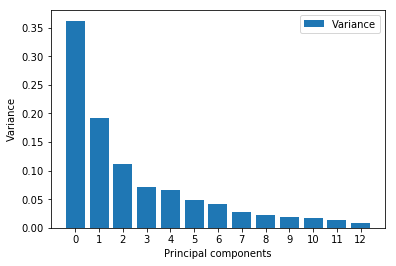

In [69]:
X = df.iloc[:,1:].values
y = df.iloc[:,0].values
# For better label representation of clusters
# We should have y labels start from 0
y = y - 1

pca = PCA()
pca = pca.fit(X)
X_pca = pca.transform()
pca.plot_component_var()

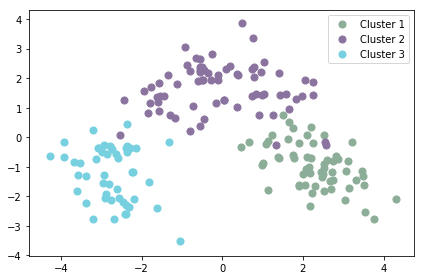

In [70]:
cluster_plot(X_pca, y)

## Sklearn implementation

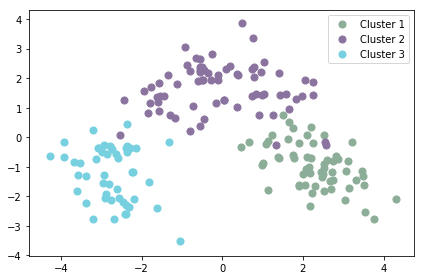

In [71]:
from sklearn.decomposition import PCA


x_sc = StandardScaler()
X_std = x_sc.fit_transform(X)
pca_sk = PCA(n_components=2)
X_pca_sk = pca_sk.fit_transform(X_std)
cluster_plot(X_pca_sk, y)